In [1]:
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import numpy
import sklearn.metrics

In [2]:
data = pd.read_csv('customer_churn.csv')


In [3]:
customer = data[['tenure', 'SeniorCitizen', 'MonthlyCharges','Churn']]
customer

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes
...,...,...,...,...
7038,24,0,84.80,No
7039,72,0,103.20,No
7040,11,0,29.60,No
7041,4,1,74.40,Yes


In [4]:
customer["Churn"] = customer["Churn"].str.replace('Yes', '1').str.replace('No', '0').astype(int)
customer["Churn"]

<ipython-input-4-992095ae63ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer["Churn"] = customer["Churn"].str.replace('Yes', '1').str.replace('No', '0').astype(int)


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [37]:
customer.shape

(7043, 4)

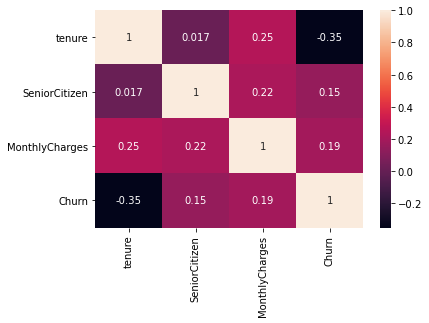

In [6]:
correllation_matrix = customer.corr()
sns.heatmap(correllation_matrix,annot=True)
plt.show()

In [7]:
# Regression model
X = customer.drop(['Churn'], axis=1)
y = customer['Churn']

In [8]:
# standardize the the numbers between -1 and 1 based on the correlation matrix.
transformer = StandardScaler().fit(X)
X_scaled = pd.DataFrame(transformer.transform(X),columns=X.columns)
X_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,-1.277445,-0.439916,-1.160323
1,0.066327,-0.439916,-0.259629
2,-1.236724,-0.439916,-0.362660
3,0.514251,-0.439916,-0.746535
4,-1.236724,-0.439916,0.197365


In [9]:
# Build the logistic regression model.

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_scaled, y)

LogisticRegression(random_state=0)

<AxesSubplot:>

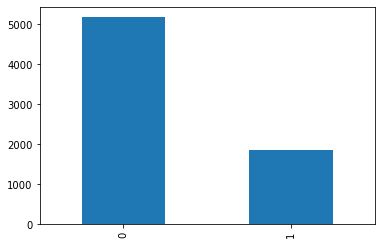

In [10]:
count_classes = pd.value_counts(customer['Churn'])
count_classes.plot(kind = 'bar')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

In [12]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.7808063600227144

In [13]:
pred = LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.6115942028985507
recall:  0.4557235421166307
f1:  0.5222772277227723


In [14]:
confusion_matrix(y_test,pred)

array([[1164,  134],
       [ 252,  211]])

In [15]:
r = sklearn.metrics.confusion_matrix(y_test, pred)

r = numpy.flip(r)
acc = (r[0][0] + r[-1][-1]) / numpy.sum(r)
print(acc)

0.7808063600227144


In [16]:
train = pd.concat([X_train, y_train],axis=1)
train.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
3296,-0.340876,-0.439916,-0.513884,0
6397,0.880735,2.273159,0.016229,0
6043,-1.196004,-0.439916,-0.817993,1
5309,1.165777,-0.439916,-1.479388,0
3000,-0.829521,-0.439916,0.654359,1


In [17]:
No_churn = train[train['Churn']==0]
Yes_churn = train[train['Churn']==1]

In [18]:
Yes_churn_oversampled = resample(Yes_churn, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(No_churn),#<- make both sets the same size
                                    random_state=0)

In [19]:
display(No_churn.shape)
display(Yes_churn_oversampled.shape)

(3876, 4)

(3876, 4)

In [39]:
train_oversampled = pd.concat([No_churn,Yes_churn_oversampled])
train_oversampled.head()


,tenure,SeniorCitizen,MonthlyCharges,Churn
3296,-0.340876,-0.439916,-0.513884,0
6397,0.880735,2.273159,0.016229,0
5309,1.165777,-0.439916,-1.479388,0
3101,1.043616,-0.439916,0.499812,0
2868,-0.259435,-0.439916,0.697566,0


In [21]:
y_train_over = train_oversampled['Churn'].copy()
X_train_over = train_oversampled.drop('Churn',axis = 1).copy()

In [22]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_over, y_train_over)
pred = LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4790764790764791
recall:  0.7170626349892009
f1:  0.57439446366782


In [23]:
confusion_matrix(y_test,pred)

array([[937, 361],
       [131, 332]])

In [24]:
r = sklearn.metrics.confusion_matrix(y_test, pred)

r = numpy.flip(r)
acc = (r[0][0] + r[-1][-1]) / numpy.sum(r)
print(acc)

0.7206132879045997


In [25]:
No_churn_undersampled = resample(No_churn, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(Yes_churn),#<- make both sets the same size
                                    random_state=0)

In [26]:
display(Yes_churn.shape)
display(No_churn_undersampled.shape)

(1406, 4)

(1406, 4)

In [41]:
train_undersampled = pd.concat([Yes_churn,No_churn_undersampled])
train_undersampled.head()


,tenure,SeniorCitizen,MonthlyCharges,Churn
6043,-1.196004,-0.439916,-0.817993,1
3000,-0.829521,-0.439916,0.654359,1
6012,-1.114563,-0.439916,0.626109,1
2407,-1.236724,-0.439916,0.197365,1
3325,-1.155283,-0.439916,0.694243,1


In [28]:
y_train_under = train_undersampled['Churn'].copy()
X_train_under = train_undersampled.drop('Churn',axis = 1).copy()

In [29]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_under, y_train_under)
pred = LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4796511627906977
recall:  0.712742980561555
f1:  0.5734144222415292


In [30]:
confusion_matrix(y_test,pred)

array([[940, 358],
       [133, 330]])

In [31]:
r = sklearn.metrics.confusion_matrix(y_test, pred)

r = numpy.flip(r)
acc = (r[0][0] + r[-1][-1]) / numpy.sum(r)
print(acc)

0.7211811470755253


In [32]:
#Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [33]:
sm = SMOTE(random_state=100,sampling_strategy='minority',k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)

In [34]:

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4776978417266187
recall:  0.7170626349892009
f1:  0.5734024179620035


In [35]:
confusion_matrix(y_test,pred)

array([[935, 363],
       [131, 332]])

In [36]:
r = sklearn.metrics.confusion_matrix(y_test, pred)

r = numpy.flip(r)
acc = (r[0][0] + r[-1][-1]) / numpy.sum(r)
print(acc)

0.7194775695627484


In [ ]:
Even a simple model will give us more than 70% accuracy. Why?
sum of the actual true yes_churn and  no_churn is 70.